In [80]:
library(bayesplot)
library(tidyverse)
library(rstan)

# Load the data
data <- read_csv("data.csv")

# Pivot wider into A x R matrix
data <- data %>% pivot_wider(id_cols     = c(animal_idx, group_idx),
                             values_from = counts,
                             names_from  = regions,
                             names_sort  = T)


# Load the fit
fit <- readRDS("fits/fit_hs.rds")
y_rep <- extract(fit, "y_rep")$y_rep


Rows: 500 Columns: 10
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): regions, group, hemisphere, global_id
dbl (6): counts, ID, region_idx, hemisphere_idx, group_idx, animal_idx

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [81]:
dim(y_rep) <- c(dim(y_rep)[1], prod(dim(y_rep)[-1])) # flatten 3rd dim


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


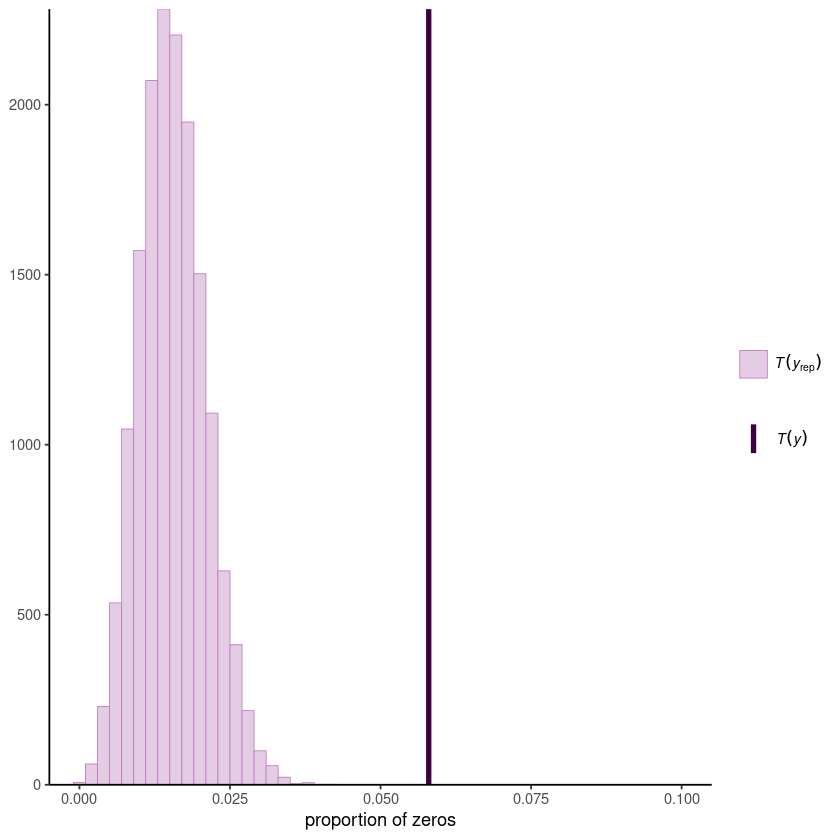

In [82]:
color_scheme_set("purple")
ppc_stat(c(as.matrix(data[,-c(1:2)])), y_rep, stat=function(y) mean(y==0)) +
    theme_classic() +
    coord_cartesian(xlim = c(0, 0.1)) +
    xlab("proportion of zeros")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


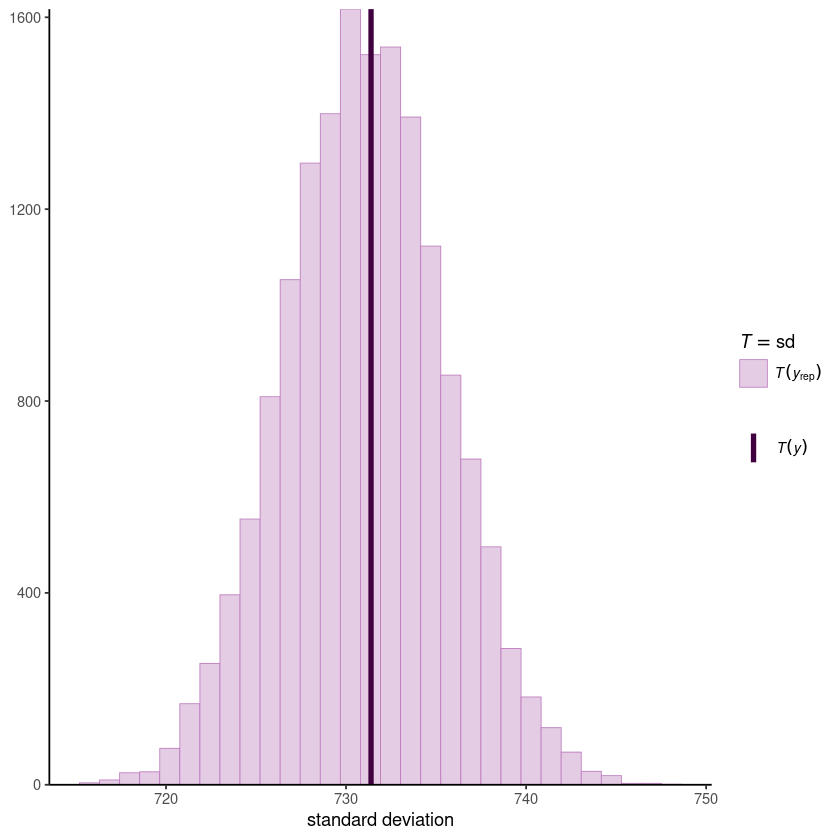

In [83]:
color_scheme_set("purple")
ppc_stat(c(as.matrix(data[,-c(1:2)])), y_rep, stat=sd) +
    theme_classic() +
    #coord_cartesian(xlim = c(0, 0.1)) +
    xlab("standard deviation")

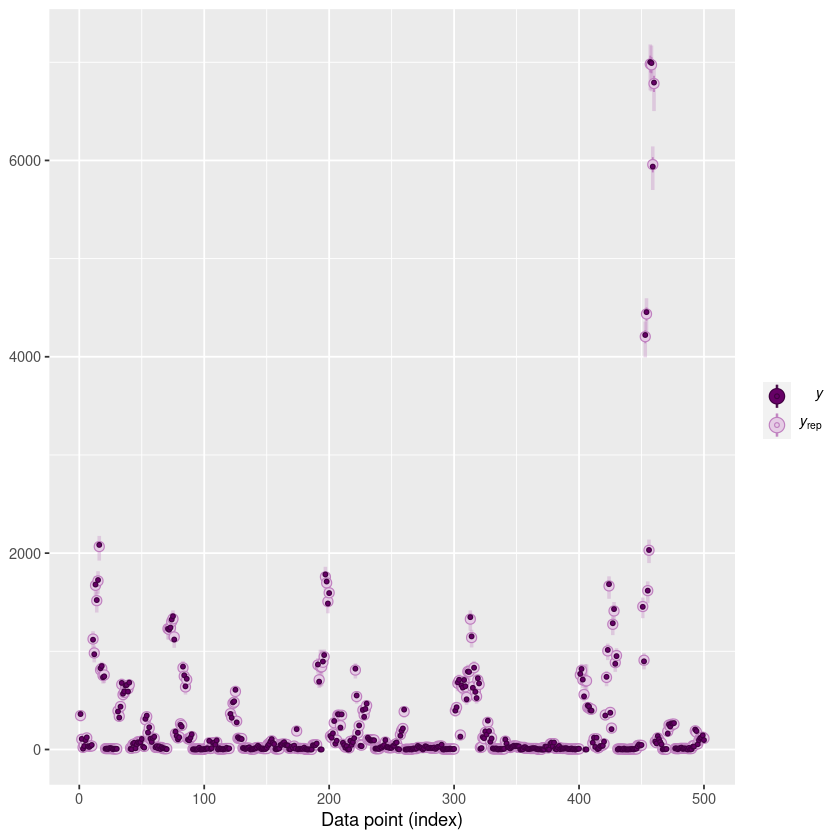

In [76]:
ppc_intervals(c(as.matrix(data[,-c(1:2)])), y_rep)

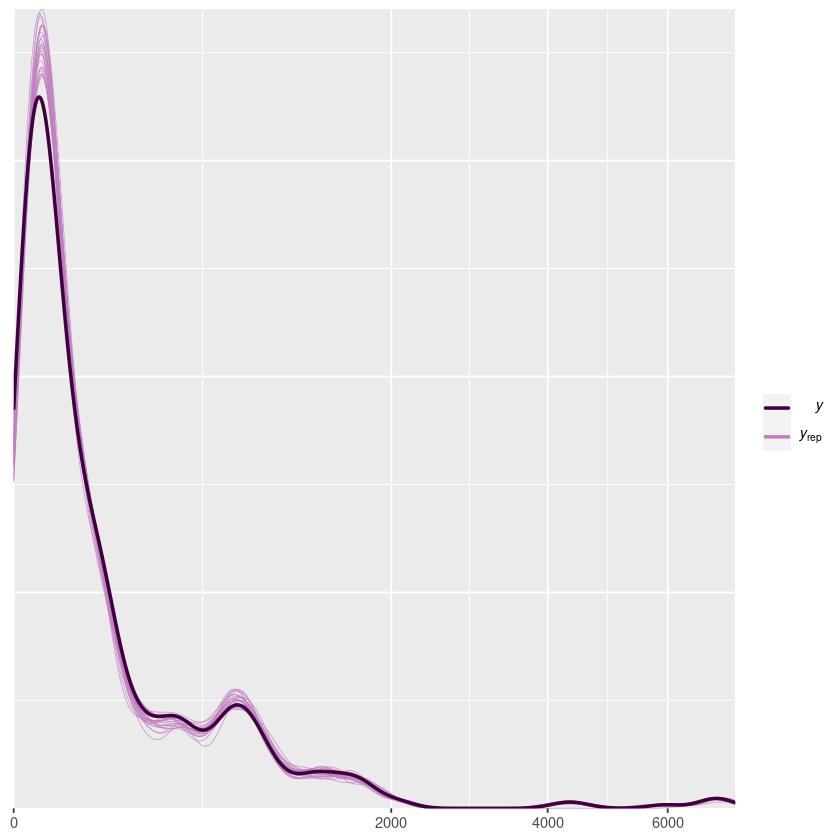

In [61]:
ppc_dens_overlay(c(as.matrix(data[,-c(1:2)])), y_rep[1:25,]) + scale_x_sqrt()

In [59]:
mean(c(as.matrix(data[,-c(1:2)])))

[1] 262.974